In [1]:
# Read in information of driver, lane change, and risk labels

import os
import pandas as pd

DRIVER_IDS = ['m9600A', 'm9601A', 'm9602B',
             'm9603A', 'm9604A', 'f9605A',
             'm9606A', 'f9608A', 'm9609A', 'm9611A']
DATA_DIR = '/Volumes/AquaAge_1/lc_data/'
RISK_DIR = os.path.join(DATA_DIR, '03_risk_level_data')

label_csv = pd.read_csv(os.path.join(RISK_DIR, '9600_lane_change_risk_scores_classification.csv'))

COL_LANE_CHANGE_INFO = ['driver', 'task', 'trip_id', 'LC_type', 'start_frame', 'end_frame']
COL_RISK_LABELS = ['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
               'score_7', 'score_8', 'score_9', 'score_10', 'normalized_risk',
               'objective_risk_label', 'S_P1', 'S_P2', 'S_P3', 'S_P4', 'S_P5', 'S_P6',
               'S_P7', 'S_P8', 'S_P9', 'S_P10']
LANE_CHANGE_INFO = label_csv[COL_LANE_CHANGE_INFO]
RISK_LABELS = label_csv[COL_RISK_LABELS]
print(LANE_CHANGE_INFO.head(5))

lane_change_cnt = len(LANE_CHANGE_INFO)
print(lane_change_cnt)


   driver  task  trip_id LC_type  start_frame  end_frame
0  f9605A     1     2014   right         6387       6462
1  f9605A     1     2014    left         7053       7132
2  f9605A     1     2014   right         5534       5601
3  f9605A     1     2014    left         5301       5364
4  f9605A     1     2014    left         1578       1649
988


In [4]:
# Read in surrounding vehicle information
def get_surrounding_data(lane_change_id):
    SURR_DIR = os.path.join(DATA_DIR, '06_surrounding_vehicle_info')
    driver_id = LANE_CHANGE_INFO['driver'][lane_change_id]
    task_id = LANE_CHANGE_INFO['task'][lane_change_id]
    lc_type = LANE_CHANGE_INFO['LC_type'][lane_change_id]
    start_frame = LANE_CHANGE_INFO['start_frame'][lane_change_id]
    end_frame = LANE_CHANGE_INFO['end_frame'][lane_change_id]
    
    for i in range(len(TIME_VARIANTS)):
        # Get time length
        t = TIME_VARIANTS[i]*10 # 10hz sampled
        start_frame = start_frame - t
        end_frame = end_frame + t
        
        if os.path.isdir(SURR_DIR):
            surr_file = SURR_DIR + '/' + driver_id + 'ex' \
                + str(task_id) + '-SurVehicleInfo.csv'
            if os.path.isfile(surr_file):
                surr_pd = pd.read_csv(surr_file)
                frame_max = len(surr_pd)    
                
                if start_frame < 0:
                    start_frame = 0  
                if end_frame >= frame_max:
                    end_frame = frame_max
                if lane_change_id % 100 == 0:
                    print('Loading surrounding vehicle information for lane change No.{}'.format(lane_change_id+1))
                each_surr_data = surr_pd.iloc[start_frame:end_frame,:]
                if lane_change_id == lane_change_cnt-1:
                    print('Surrounding vehicle information data is loaded.\n')    
            else:
                if driver_id == 'm9607A':
                    pass
                else:
                    print("File {} does not exsit.".format(surr_file))
        else:
            print("Folder {} does not exsit.".format(SURR_DIR))
        return each_surr_data
             

In [5]:
# Read in driving data
DRV_DIR = os.path.join(DATA_DIR, '01_driving_data')
#TIME_VARIAENTS = [1, 3, 5, 10] # Cut data before&after 1,3,5,10 seconds
TIME_VARIANTS = [3] # Cut data before&after 1,3,5,10 seconds

DATA = []
# Organize ego-vehicle pose and surrouding vehicle info in lane change order.
for lane_change_id in range(len(LANE_CHANGE_INFO)):
    driver_id = LANE_CHANGE_INFO['driver'][lane_change_id]
    task_id = LANE_CHANGE_INFO['task'][lane_change_id]
    lc_type = LANE_CHANGE_INFO['LC_type'][lane_change_id]
    start_frame = LANE_CHANGE_INFO['start_frame'][lane_change_id]
    end_frame = LANE_CHANGE_INFO['end_frame'][lane_change_id]
    
    for i in range(len(TIME_VARIANTS)):
        # Get time length
        t = TIME_VARIANTS[i]*10 # 10hz sampled
        start_frame = start_frame - t
        end_frame = end_frame + t
        
        each_drv_dir = os.path.join(DRV_DIR, driver_id)
        if os.path.isdir(each_drv_dir):
            drv_file = each_drv_dir +'/drv/ex' + str(task_id) +'/' \
                + driver_id + 'ex' + str(task_id) + '_drv.csv'
            if os.path.isfile(drv_file):
                drv_pd = pd.read_csv(drv_file)
                frame_max = len(drv_pd)    
                
                if start_frame < 0:
                    start_frame = 0  
                if end_frame >= frame_max:
                    end_frame = frame_max
                if lane_change_id % 100 == 0:
                    print('Loading driving data for lane change No.{}'.format(lane_change_id+1))    
                each_drv_data = drv_pd.iloc[start_frame:end_frame,:]
                each_surr_data = get_surrounding_data(lane_change_id)
                
                data = {'lane_change_id': lane_change_id + 1,
                    'lane_change_info': LANE_CHANGE_INFO.iloc[lane_change_id,:],
                     'risk_labels': RISK_LABELS.iloc[lane_change_id,:],
                     'drv_data': each_drv_data,
                     'surr_info': each_surr_data }
                DATA.append(data)
                if lane_change_id == lane_change_cnt-1:
                    print('\nData loaded.\n')
            else:
                print("File {} does not exsit.".format(drv_file))
        else:
            if driver_id == 'm9607A':
                pass
            else:
                print("Folder {} does not exsit.".format(each_drv_dir))

Loading driving data for lane change No.1
Loading surrounding vehicle information for lane change No.1
Loading driving data for lane change No.101
Loading surrounding vehicle information for lane change No.101
Loading driving data for lane change No.201
Loading surrounding vehicle information for lane change No.201
Loading driving data for lane change No.301
Loading surrounding vehicle information for lane change No.301
Loading driving data for lane change No.401
Loading surrounding vehicle information for lane change No.401
Loading driving data for lane change No.501
Loading surrounding vehicle information for lane change No.501
Loading driving data for lane change No.601
Loading surrounding vehicle information for lane change No.601
Loading driving data for lane change No.801
Loading surrounding vehicle information for lane change No.801
Loading driving data for lane change No.901
Loading surrounding vehicle information for lane change No.901
Surrounding vehicle information data is l

In [6]:
import pickle
pickle_name = 'pickle/Risk_DATA_' + str(TIME_VARIANTS[0]) + '.pkl'
with open(pickle_name, "wb") as f:
    pickle.dump(DATA, f) #保存

In [7]:
def dynamic(signal):
    N = 10
    o_t = []
    T = len(signal)
    for t in range(T):
        if t < (T - 2*N):
            sum1 = sum(n * signal.iloc[t + n] for n in range(2 * N) if t + n < T)
            sum2 = sum(n * n for n in range(2 * N) if t + n < T)
            if sum2 == 0:
                sum2 = 1
            else:
                o_t.append(sum1 / sum2)
        else:
            o_t.append(o_t[t-1])
    return o_t

In [10]:
def get_dynamic_data(x):
    """
    Argument:
    x --  driving signals
    
    Returns:
    X -- driving signals with first order and second order signals
    """
    feature_names = ['brake', 'accel',  'velocity', 'steering_angle', 'a_lon', 'a_lat']
    dynamic_features = ['brake', 'accel', 'steering_angle']
    X = pd.DataFrame(data=x)
    X.columns = feature_names
    
    for feature in feature_names:
        f1_feature = '1st_order_' + feature
        o_t = dynamic(X[feature])
        X[f1_feature] = o_t
        s2_feature =  '2nd_order_' + feature
        o_o_t = dynamic(X[f1_feature])
        X[s2_feature] = o_o_t
        
    return X

In [8]:
import numpy as np
def divide_surr_zone(surr_info):
    frame_num, _ = surr_info.shape
    vehicle_num = int(_/4)
    surr_zones_ttc = np.zeros((frame_num,10))
    #y:longidunal direction, x:lateral direction
    
    for i_frame in range(frame_num):
        for i in range(vehicle_num):
            
            if np.sum(surr_info.iloc[i_frame,i*4:i*4+4]) == 0:
                zone_id = 0 #vehicle has no data
            else:
                #'vehicle1-relx(m)', 'vehicle1-rely(m)', 'vehicle1-relvx(m/s)','vehicle1-relvy(m/s)'
                relx = surr_info.iloc[i_frame,i*4]
                rely = surr_info.iloc[i_frame,i*4+1]
                relvx = surr_info.iloc[i_frame,i*4+2]
                relvy = surr_info.iloc[i_frame,i*4+3]
                ttcx = relx / (relvx + 0.000001)
                ttcy = rely / (relvy + 0.000001)
                
                if rely < 50 and rely > 10 and relx > 1.625:
                    zone_id = 1
                elif rely < 10 and rely > -10 and relx > 1.625:
                    zone_id = 2
                elif rely < 50 and rely > 0 and relx < 1.625 and relx > -1.625:
                    zone_id = 3
                elif rely < 50 and rely > 10 and relx < -1.625:
                    zone_id = 4
                elif rely < 10 and rely > -10 and relx < -1.625:
                    zone_id = 5
                else:
                    zone_id = 0
            if zone_id != 0:
                surr_zones_ttc[i_frame][(zone_id-1)*2] = ttcx
                surr_zones_ttc[i_frame][(zone_id-1)*2+1] = ttcy
        
    cols = ['zone_1_x', 'zone_1_y', 'zone_2_x', 'zone_2_y','zone_3_x', 'zone_3_y', 'zone_4_x', 'zone_4_y',
           'zone_5_x', 'zone_5_y']
    surr_zones_ttc_pd = pd.DataFrame(surr_zones_ttc)
    surr_zones_ttc_pd.columns = cols
    return surr_zones_ttc_pd 

In [11]:
import pickle
def preprocess():
    pickle_name = 'pickle/Risk_DATA_' + str(TIME_VARIANTS[0]) + '.pkl'
    with open(pickle_name, "rb") as f:
        DATA = pickle.load(f)
        
    for i in range(len(DATA)):
        lane_change_id = DATA[i]['lane_change_id']
        risk_labels = DATA[i]['risk_labels']
        drv_data = DATA[i]['drv_data']
        surr_info = DATA[i]['surr_info']
        dynamic_drv = get_dynamic_data(drv_data)
        surr_zones = divide_surr_zone(surr_info)
        DATA[i]['dynamic_drv'] = dynamic_drv    
        DATA[i]['surr_zones'] = surr_zones

        if i % 100 == 0:
            print(i)
        
    pickle_name = 'pickle/risk_dynamic_data_' + str(TIME_VARIANTS[0]) + '.pkl'
    with open(pickle_name, "wb") as f:
        pickle.dump(DATA, f) #保存
        print('Data saved.')
preprocess()       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9                 2.00000
score_10                2.00000
normalized_risk        -0.30375
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 0, dtype: float64
0
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 4.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 2.00000
score_4                 2.00000
score_5                 5.00000
score_6                 2.00000
score_7                 2.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.27309
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    1.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 12, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 2.00000
score_4                 3.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9        

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.47683
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 24, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9        

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 3.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.20952
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 36, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9        

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.68686
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 48, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9        

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.58325
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 60, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 3.00000
score_4                 4.00000
score_5                 3.00000
score_6                 2.00000
score_7                 4.00000
score_8                 4.00000
score_9        

score_1                 4.00000
score_2                 4.00000
score_3                 1.00000
score_4                 4.00000
score_5                 2.00000
score_6                 3.00000
score_7                 3.00000
score_8                 4.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.57797
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    1.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 72, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 5.00000
score_5                 3.00000
score_6                 2.00000
score_7                 3.00000
score_8                 3.00000
score_9        

score_1                 3.00000
score_2                 1.00000
score_3                 2.00000
score_4                 5.00000
score_5                 2.00000
score_6                 5.00000
score_7                 4.00000
score_8                 4.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.80679
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    1.00000
S_P5                    0.00000
S_P6                    1.00000
S_P7                    1.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 84, dtype: float64
score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 3.000000
score_5                 2.000000
score_6                 1.000000
score_7                 2.000000
score_8                 2.000000
score_9

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.27415
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 96, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9        

score_1                 1.000
score_2                 1.000
score_3                 1.000
score_4                 1.000
score_5                 1.000
score_6                 1.000
score_7                 1.000
score_8                 1.000
score_9                 1.000
score_10                1.000
normalized_risk        -1.126
objective_risk_label    0.000
S_P1                    0.000
S_P2                    0.000
S_P3                    0.000
S_P4                    0.000
S_P5                    0.000
S_P6                    0.000
S_P7                    0.000
S_P8                    0.000
S_P9                    0.000
S_P10                   0.000
Name: 108, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.

score_1                 3.0000
score_2                 1.0000
score_3                 1.0000
score_4                 2.0000
score_5                 1.0000
score_6                 1.0000
score_7                 3.0000
score_8                 2.0000
score_9                 2.0000
score_10                1.0000
normalized_risk        -0.3757
objective_risk_label    0.0000
S_P1                    0.0000
S_P2                    0.0000
S_P3                    0.0000
S_P4                    0.0000
S_P5                    0.0000
S_P6                    0.0000
S_P7                    0.0000
S_P8                    0.0000
S_P9                    0.0000
S_P10                   0.0000
Name: 120, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 2.00000
scor

score_1                 5.0000
score_2                 4.0000
score_3                 3.0000
score_4                 3.0000
score_5                 4.0000
score_6                 1.0000
score_7                 3.0000
score_8                 4.0000
score_9                 4.0000
score_10                3.0000
normalized_risk         1.1073
objective_risk_label    0.0000
S_P1                    1.0000
S_P2                    1.0000
S_P3                    0.0000
S_P4                    0.0000
S_P5                    0.0000
S_P6                    0.0000
S_P7                    0.0000
S_P8                    0.0000
S_P9                    1.0000
S_P10                   1.0000
Name: 132, dtype: float64
score_1                 3.00000
score_2                 4.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9                 2.00000
scor

score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 1.000000
score_6                 2.000000
score_7                 3.000000
score_8                 2.000000
score_9                 3.000000
score_10                1.000000
normalized_risk        -0.054228
objective_risk_label    0.000000
S_P1                    0.000000
S_P2                    0.000000
S_P3                    0.000000
S_P4                    0.000000
S_P5                    0.000000
S_P6                    0.000000
S_P7                    0.000000
S_P8                    0.000000
S_P9                    0.000000
S_P10                   0.000000
Name: 144, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 3.00000
score_6                 1.00000
score_7                 3.00000
score_8                 

score_1                 4.0000
score_2                 1.0000
score_3                 1.0000
score_4                 3.0000
score_5                 2.0000
score_6                 1.0000
score_7                 3.0000
score_8                 4.0000
score_9                 4.0000
score_10                1.0000
normalized_risk         0.2799
objective_risk_label    0.0000
S_P1                    0.0000
S_P2                    0.0000
S_P3                    0.0000
S_P4                    0.0000
S_P5                    0.0000
S_P6                    0.0000
S_P7                    0.0000
S_P8                    0.0000
S_P9                    1.0000
S_P10                   0.0000
Name: 156, dtype: float64
score_1                 4.0000
score_2                 5.0000
score_3                 4.0000
score_4                 5.0000
score_5                 4.0000
score_6                 4.0000
score_7                 3.0000
score_8                 4.0000
score_9                 4.0000
score_10     

score_1                 3.00000
score_2                 1.00000
score_3                 3.00000
score_4                 4.00000
score_5                 3.00000
score_6                 4.00000
score_7                 3.00000
score_8                 3.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.57118
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    1.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 168, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9       

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 2.00000
score_6                 3.00000
score_7                 2.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.20406
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 180, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 4.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9       

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 2.00000
score_6                 2.00000
score_7                 3.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.10641
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 192, dtype: float64
score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 2.000000
score_6                 1.000000
score_7                 3.000000
score_8                 3.000000
score_

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 4.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.25727
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 204, dtype: float64
score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 1.000000
score_5                 4.000000
score_6                 1.000000
score_7                 3.000000
score_8                 3.000000
score_

score_1                 3.00000
score_2                 2.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 1.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.35678
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 216, dtype: float64
score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 1.000000
score_5                 2.000000
score_6                 2.000000
score_7                 3.000000
score_8                 2.000000
score_

score_1                 3.000
score_2                 2.000
score_3                 1.000
score_4                 4.000
score_5                 4.000
score_6                 2.000
score_7                 3.000
score_8                 3.000
score_9                 4.000
score_10                1.000
normalized_risk         0.511
objective_risk_label    0.000
S_P1                    0.000
S_P2                    0.000
S_P3                    0.000
S_P4                    0.000
S_P5                    0.000
S_P6                    0.000
S_P7                    0.000
S_P8                    0.000
S_P9                    1.000
S_P10                   0.000
Name: 228, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 3.00000
score_4                 4.00000
score_5                 4.00000
score_6                 2.00000
score_7                 4.00000
score_8                 3.00000
score_9                 3.00000
score_10                2.

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 1.00000
score_8                 3.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.68491
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 240, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 2.00000
score_4                 5.00000
score_5                 4.00000
score_6                 4.00000
score_7                 4.00000
score_8                 5.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 2.00000
score_4                 1.00000
score_5                 3.00000
score_6                 2.00000
score_7                 3.00000
score_8                 2.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.14053
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 252, dtype: float64
score_1                 4.00000
score_2                 4.00000
score_3                 1.00000
score_4                 4.00000
score_5                 2.00000
score_6                 3.00000
score_7                 3.00000
score_8                 4.00000
score_9       

score_1                 4.00000
score_2                 1.00000
score_3                 2.00000
score_4                 5.00000
score_5                 2.00000
score_6                 4.00000
score_7                 3.00000
score_8                 4.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.61503
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    1.00000
S_P5                    0.00000
S_P6                    1.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 264, dtype: float64
score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 2.000000
score_6                 1.000000
score_7                 2.000000
score_8                 3.000000
score_

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.17388
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 276, dtype: float64
score_1                 5.00000
score_2                 5.00000
score_3                 2.00000
score_4                 4.00000
score_5                 4.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9       

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.68015
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 288, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.38324
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 300, dtype: float64
300
score_1                 4.00000
score_2                 1.00000
score_3                 3.00000
score_4                 3.00000
score_5                 3.00000
score_6                 1.00000
score_7                 3.00000
score_8                 4.00000
score_9   

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 1.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.48707
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 312, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 3.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9       

score_1                 3.00000
score_2                 2.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.14724
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 324, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9       

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.12805
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 336, dtype: float64
score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 2.000000
score_6                 2.000000
score_7                 2.000000
score_8                 3.000000
score_

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 2.00000
score_7                 2.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.45349
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 348, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9       

score_1                 4.00000
score_2                 5.00000
score_3                 2.00000
score_4                 4.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.38368
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    1.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 360, dtype: float64
score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 4.000000
score_5                 2.000000
score_6                 1.000000
score_7                 3.000000
score_8                 2.000000
score_

score_1                 2.00000
score_2                 3.00000
score_3                 1.00000
score_4                 1.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.41772
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 372, dtype: float64
score_1                 1.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 4.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9       

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 3.00000
score_6                 1.00000
score_7                 1.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.41288
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 384, dtype: float64
score_1                 4.00000
score_2                 2.00000
score_3                 1.00000
score_4                 3.00000
score_5                 2.00000
score_6                 2.00000
score_7                 4.00000
score_8                 3.00000
score_9       

score_1                 2.0000
score_2                 1.0000
score_3                 3.0000
score_4                 2.0000
score_5                 1.0000
score_6                 1.0000
score_7                 2.0000
score_8                 3.0000
score_9                 2.0000
score_10                1.0000
normalized_risk        -0.3158
objective_risk_label    0.0000
S_P1                    0.0000
S_P2                    0.0000
S_P3                    0.0000
S_P4                    0.0000
S_P5                    0.0000
S_P6                    0.0000
S_P7                    0.0000
S_P8                    0.0000
S_P9                    0.0000
S_P10                   0.0000
Name: 396, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 3.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 1.00000
score_8                 2.00000
score_9                 2.00000
scor

score_1                 1.0000
score_2                 1.0000
score_3                 2.0000
score_4                 1.0000
score_5                 1.0000
score_6                 1.0000
score_7                 1.0000
score_8                 1.0000
score_9                 1.0000
score_10                1.0000
normalized_risk        -1.0117
objective_risk_label    0.0000
S_P1                    0.0000
S_P2                    0.0000
S_P3                    0.0000
S_P4                    0.0000
S_P5                    0.0000
S_P6                    0.0000
S_P7                    0.0000
S_P8                    0.0000
S_P9                    0.0000
S_P10                   0.0000
Name: 408, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 1.00000
score_8                 1.00000
score_9                 1.00000
scor

score_1                 2.00000
score_2                 1.00000
score_3                 4.00000
score_4                 4.00000
score_5                 2.00000
score_6                 3.00000
score_7                 2.00000
score_8                 2.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.22734
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    1.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 420, dtype: float64
score_1                 2.00000
score_2                 2.00000
score_3                 3.00000
score_4                 3.00000
score_5                 5.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 3.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.41569
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 432, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9       

score_1                 4.000000
score_2                 2.000000
score_3                 2.000000
score_4                 3.000000
score_5                 1.000000
score_6                 1.000000
score_7                 3.000000
score_8                 2.000000
score_9                 1.000000
score_10                1.000000
normalized_risk        -0.082837
objective_risk_label    0.000000
S_P1                    0.000000
S_P2                    0.000000
S_P3                    0.000000
S_P4                    0.000000
S_P5                    0.000000
S_P6                    0.000000
S_P7                    0.000000
S_P8                    0.000000
S_P9                    0.000000
S_P10                   0.000000
Name: 444, dtype: float64
score_1                 4.0000
score_2                 1.0000
score_3                 1.0000
score_4                 2.0000
score_5                 2.0000
score_6                 1.0000
score_7                 3.0000
score_8                 3.0000


score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 5.00000
score_5                 2.00000
score_6                 2.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.32404
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    1.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 456, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.57902
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 468, dtype: float64
score_1                 2.0000
score_2                 1.0000
score_3                 1.0000
score_4                 1.0000
score_5                 1.0000
score_6                 1.0000
score_7                 3.0000
score_8                 1.0000
score_9               

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.57902
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 480, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 3.00000
score_6                 1.00000
score_7                 1.00000
score_8                 2.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 4.00000
score_5                 2.00000
score_6                 2.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.15219
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 492, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9       

score_1                 4.00000
score_2                 1.00000
score_3                 3.00000
score_4                 1.00000
score_5                 4.00000
score_6                 1.00000
score_7                 4.00000
score_8                 3.00000
score_9                 3.00000
score_10                3.00000
normalized_risk         0.55316
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   1.00000
Name: 504, dtype: float64
score_1                 2.0000
score_2                 1.0000
score_3                 1.0000
score_4                 1.0000
score_5                 1.0000
score_6                 1.0000
score_7                 2.0000
score_8                 2.0000
score_9               

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.68616
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 516, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.28035
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 528, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 3.00000
score_9       

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 1.00000
score_10                1.00000
normalized_risk        -0.67901
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 540, dtype: float64
score_1                 3.00000
score_2                 3.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 4.00000
score_9       

score_1                 4.0000
score_2                 5.0000
score_3                 4.0000
score_4                 5.0000
score_5                 5.0000
score_6                 1.0000
score_7                 4.0000
score_8                 5.0000
score_9                 4.0000
score_10                2.0000
normalized_risk         1.4644
objective_risk_label    1.0000
S_P1                    0.0000
S_P2                    1.0000
S_P3                    1.0000
S_P4                    1.0000
S_P5                    1.0000
S_P6                    0.0000
S_P7                    0.0000
S_P8                    1.0000
S_P9                    1.0000
S_P10                   0.0000
Name: 552, dtype: float64
score_1                 4.000
score_2                 3.000
score_3                 3.000
score_4                 5.000
score_5                 3.000
score_6                 2.000
score_7                 4.000
score_8                 4.000
score_9                 4.000
score_10              

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.37709
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 564, dtype: float64
score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 1.000000
score_6                 4.000000
score_7                 2.000000
score_8                 3.000000
score_

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.27275
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 576, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 3.00000
score_6                 1.00000
score_7                 3.00000
score_8                 1.00000
score_9       

score_1                 2.000000
score_2                 2.000000
score_3                 1.000000
score_4                 3.000000
score_5                 2.000000
score_6                 2.000000
score_7                 3.000000
score_8                 2.000000
score_9                 3.000000
score_10                1.000000
normalized_risk         0.035829
objective_risk_label    0.000000
S_P1                    0.000000
S_P2                    0.000000
S_P3                    0.000000
S_P4                    0.000000
S_P5                    0.000000
S_P6                    0.000000
S_P7                    0.000000
S_P8                    0.000000
S_P9                    0.000000
S_P10                   0.000000
Name: 588, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 3.00000
score_6                 1.00000
score_7                 3.00000
score_8                 

score_1                 3.00000
score_2                 2.00000
score_3                 1.00000
score_4                 3.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 4.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.20407
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 600, dtype: float64
600
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 4.00000
score_6                 2.00000
score_7                 3.00000
score_8                 2.00000
score_9   

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.36789
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 612, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9       

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.02549
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 624, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 3.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.27879
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 636, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 3.00000
score_4                 4.00000
score_5                 2.00000
score_6                 2.00000
score_7                 3.00000
score_8                 3.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.17142
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 648, dtype: float64
score_1                 5.00000
score_2                 4.00000
score_3                 1.00000
score_4                 1.00000
score_5                 5.00000
score_6                 1.00000
score_7                 4.00000
score_8                 4.00000
score_9       

score_1                 4.0000
score_2                 3.0000
score_3                 4.0000
score_4                 5.0000
score_5                 4.0000
score_6                 5.0000
score_7                 5.0000
score_8                 5.0000
score_9                 5.0000
score_10                2.0000
normalized_risk         1.8069
objective_risk_label    1.0000
S_P1                    0.0000
S_P2                    0.0000
S_P3                    1.0000
S_P4                    1.0000
S_P5                    0.0000
S_P6                    1.0000
S_P7                    1.0000
S_P8                    1.0000
S_P9                    1.0000
S_P10                   0.0000
Name: 789, dtype: float64
score_1                 4.0000
score_2                 5.0000
score_3                 3.0000
score_4                 5.0000
score_5                 4.0000
score_6                 4.0000
score_7                 4.0000
score_8                 4.0000
score_9                 5.0000
score_10     

score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 1.000000
score_6                 1.000000
score_7                 3.000000
score_8                 3.000000
score_9                 3.000000
score_10                1.000000
normalized_risk        -0.080885
objective_risk_label    0.000000
S_P1                    0.000000
S_P2                    0.000000
S_P3                    0.000000
S_P4                    0.000000
S_P5                    0.000000
S_P6                    0.000000
S_P7                    0.000000
S_P8                    0.000000
S_P9                    0.000000
S_P10                   0.000000
Name: 801, dtype: float64
score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 4.000000
score_5                 2.000000
score_6                 2.000000
score_7                 2.000000
score_8          

score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 2.000000
score_6                 1.000000
score_7                 3.000000
score_8                 3.000000
score_9                 4.000000
score_10                1.000000
normalized_risk         0.035389
objective_risk_label    0.000000
S_P1                    0.000000
S_P2                    0.000000
S_P3                    0.000000
S_P4                    0.000000
S_P5                    0.000000
S_P6                    0.000000
S_P7                    0.000000
S_P8                    0.000000
S_P9                    1.000000
S_P10                   0.000000
Name: 813, dtype: float64
score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 1.000000
score_6                 1.000000
score_7                 3.000000
score_8          

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.43111
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 825, dtype: float64
score_1                 4.0000
score_2                 3.0000
score_3                 2.0000
score_4                 5.0000
score_5                 4.0000
score_6                 5.0000
score_7                 4.0000
score_8                 5.0000
score_9               

score_1                 3.00000
score_2                 2.00000
score_3                 1.00000
score_4                 4.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.15624
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 837, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9       

score_1                 4.0000
score_2                 5.0000
score_3                 4.0000
score_4                 5.0000
score_5                 5.0000
score_6                 1.0000
score_7                 4.0000
score_8                 4.0000
score_9                 4.0000
score_10                3.0000
normalized_risk         1.4263
objective_risk_label    1.0000
S_P1                    0.0000
S_P2                    1.0000
S_P3                    1.0000
S_P4                    1.0000
S_P5                    1.0000
S_P6                    0.0000
S_P7                    0.0000
S_P8                    0.0000
S_P9                    1.0000
S_P10                   1.0000
Name: 849, dtype: float64
score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 1.000000
score_5                 1.000000
score_6                 1.000000
score_7                 4.000000
score_8                 3.000000
score_9                 2.00

score_1                 3.00000
score_2                 1.00000
score_3                 4.00000
score_4                 3.00000
score_5                 2.00000
score_6                 3.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.37792
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    1.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 861, dtype: float64
score_1                 4.0000
score_2                 3.0000
score_3                 3.0000
score_4                 5.0000
score_5                 4.0000
score_6                 4.0000
score_7                 4.0000
score_8                 4.0000
score_9               

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 3.00000
score_8                 2.00000
score_9                 3.00000
score_10                1.00000
normalized_risk        -0.48036
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 873, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 2.00000
score_6                 1.00000
score_7                 2.00000
score_8                 1.00000
score_9       

score_1                 4.0000
score_2                 5.0000
score_3                 3.0000
score_4                 4.0000
score_5                 3.0000
score_6                 4.0000
score_7                 4.0000
score_8                 5.0000
score_9                 4.0000
score_10                2.0000
normalized_risk         1.3924
objective_risk_label    0.0000
S_P1                    0.0000
S_P2                    1.0000
S_P3                    0.0000
S_P4                    0.0000
S_P5                    0.0000
S_P6                    1.0000
S_P7                    1.0000
S_P8                    1.0000
S_P9                    1.0000
S_P10                   0.0000
Name: 885, dtype: float64
score_1                 4.0000
score_2                 5.0000
score_3                 2.0000
score_4                 5.0000
score_5                 3.0000
score_6                 3.0000
score_7                 4.0000
score_8                 3.0000
score_9                 4.0000
score_10     

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 1.00000
score_8                 2.00000
score_9                 4.00000
score_10                1.00000
normalized_risk        -0.38034
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 897, dtype: float64
score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 1.000000
score_6                 1.000000
score_7                 3.000000
score_8                 3.000000
score_

score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 3.00000
score_5                 2.00000
score_6                 3.00000
score_7                 3.00000
score_8                 3.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.35312
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 909, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 4.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9       

score_1                 4.00000
score_2                 4.00000
score_3                 2.00000
score_4                 4.00000
score_5                 2.00000
score_6                 2.00000
score_7                 3.00000
score_8                 3.00000
score_9                 3.00000
score_10                1.00000
normalized_risk         0.55703
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    1.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 921, dtype: float64
score_1                 5.00000
score_2                 1.00000
score_3                 2.00000
score_4                 1.00000
score_5                 4.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9       

score_1                 4.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 1.000000
score_6                 1.000000
score_7                 2.000000
score_8                 3.000000
score_9                 4.000000
score_10                1.000000
normalized_risk        -0.077401
objective_risk_label    0.000000
S_P1                    0.000000
S_P2                    0.000000
S_P3                    0.000000
S_P4                    0.000000
S_P5                    0.000000
S_P6                    0.000000
S_P7                    0.000000
S_P8                    0.000000
S_P9                    1.000000
S_P10                   0.000000
Name: 933, dtype: float64
score_1                 4.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 3.00000
score_6                 1.00000
score_7                 3.00000
score_8                 

score_1                 3.000000
score_2                 1.000000
score_3                 1.000000
score_4                 2.000000
score_5                 4.000000
score_6                 1.000000
score_7                 2.000000
score_8                 3.000000
score_9                 3.000000
score_10                1.000000
normalized_risk        -0.051027
objective_risk_label    0.000000
S_P1                    0.000000
S_P2                    0.000000
S_P3                    0.000000
S_P4                    0.000000
S_P5                    0.000000
S_P6                    0.000000
S_P7                    0.000000
S_P8                    0.000000
S_P9                    0.000000
S_P10                   0.000000
Name: 945, dtype: float64
score_1                 3.00000
score_2                 1.00000
score_3                 1.00000
score_4                 2.00000
score_5                 1.00000
score_6                 1.00000
score_7                 2.00000
score_8                 

score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 3.00000
score_6                 1.00000
score_7                 1.00000
score_8                 1.00000
score_9                 2.00000
score_10                1.00000
normalized_risk        -0.71736
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    0.00000
S_P10                   0.00000
Name: 957, dtype: float64
score_1                 2.00000
score_2                 1.00000
score_3                 1.00000
score_4                 1.00000
score_5                 1.00000
score_6                 1.00000
score_7                 1.00000
score_8                 2.00000
score_9       

score_1                 3.00000
score_2                 1.00000
score_3                 2.00000
score_4                 3.00000
score_5                 2.00000
score_6                 1.00000
score_7                 3.00000
score_8                 3.00000
score_9                 4.00000
score_10                1.00000
normalized_risk         0.20138
objective_risk_label    0.00000
S_P1                    0.00000
S_P2                    0.00000
S_P3                    0.00000
S_P4                    0.00000
S_P5                    0.00000
S_P6                    0.00000
S_P7                    0.00000
S_P8                    0.00000
S_P9                    1.00000
S_P10                   0.00000
Name: 969, dtype: float64
score_1                 3.0000
score_2                 5.0000
score_3                 3.0000
score_4                 4.0000
score_5                 4.0000
score_6                 1.0000
score_7                 4.0000
score_8                 4.0000
score_9               

score_1                 5.0000
score_2                 4.0000
score_3                 2.0000
score_4                 4.0000
score_5                 2.0000
score_6                 4.0000
score_7                 4.0000
score_8                 3.0000
score_9                 4.0000
score_10                2.0000
normalized_risk         1.1591
objective_risk_label    0.0000
S_P1                    1.0000
S_P2                    1.0000
S_P3                    0.0000
S_P4                    0.0000
S_P5                    0.0000
S_P6                    1.0000
S_P7                    0.0000
S_P8                    0.0000
S_P9                    1.0000
S_P10                   0.0000
Name: 981, dtype: float64
score_1                 1.000
score_2                 1.000
score_3                 1.000
score_4                 1.000
score_5                 1.000
score_6                 1.000
score_7                 1.000
score_8                 1.000
score_9                 1.000
score_10              

In [2]:
import pickle
TIME_VARIANTS = [3]
RISK_THRESHOLD_equ = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
RISK_THRESHOLD_per = [5, 4, 4, 5, 4, 4, 4, 4, 5, 2]

RANDOM_STATE = 123
pickle_name = 'pickle/risk_dynamic_data_' + str(TIME_VARIANTS[0]) + '.pkl'
with open(pickle_name, "rb") as f:
    DATA = pickle.load(f)
            
SUBJECTIVE_RISK = []
for i_evaluator in range(10):
    SUBJECTIVE_RISK_i = []
    for i_lc in DATA:
        SUBJECTIVE_RISK_temp = i_lc['risk_labels']
        score_i = 'score_'+ str(i_evaluator+1)
        SUBJECTIVE_RISK_i.append(SUBJECTIVE_RISK_temp[score_i])
    SUBJECTIVE_RISK.append(SUBJECTIVE_RISK_i)

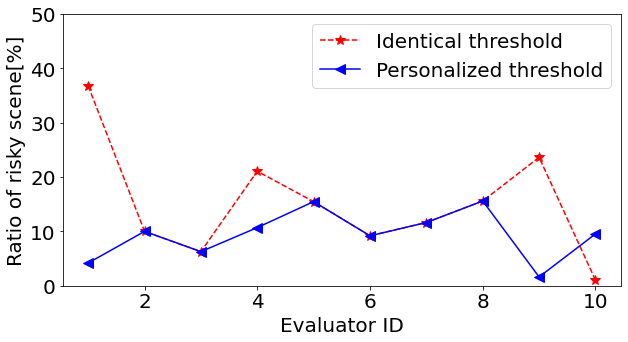

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def define_risk_scene():
    percentage_equ = []
    percentage_per = []
    plt.rcParams["font.size"] = 20
    ids = []
    for i_evaluator in range(10):
        cnt_equ = 0
        SUBJECTIVE_RISK_i = SUBJECTIVE_RISK[i_evaluator]
        for i in SUBJECTIVE_RISK_i:
            if i >= RISK_THRESHOLD_equ[i_evaluator]:
                cnt_equ += 1
        percentage_equ.append(cnt_equ*100/len(SUBJECTIVE_RISK_i))
        cnt_per = 0
        for j in SUBJECTIVE_RISK_i:
            if j >= RISK_THRESHOLD_per[i_evaluator]:
                cnt_per += 1
        percentage_per.append(cnt_per*100/len(SUBJECTIVE_RISK_i))
        ids.append(i_evaluator+1)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,1,1)
    plt.plot(ids, percentage_equ, marker="*", markersize=10, markerfacecolor="r", color="r", linestyle="dashed")
    plt.plot(ids, percentage_per, marker="<", markersize=10, markerfacecolor="b", color="b")
    plt.xlabel("Evaluator ID")
    plt.ylabel("Ratio of risky scene[%]")
    plt.legend(("Identical threshold", "Personalized threshold"), loc=1)
    plt.ylim([0, 50])
    
    plt.grid(which='minor',color='black',linestyle='-.')
    #ax.set_xticks(])
    plt.savefig("fig/risky_scenes.png")

define_risk_scene()

In [16]:
def get_subjective_risk_clf(i_evaluator):
    risk_label_old = SUBJECTIVE_RISK[i_evaluator]
    risk_label_clf = []
    for i in risk_label_old:
        if i >= RISK_THRESHOLD[i_evaluator]:
            risk_label_clf.append(1)
        else:
            risk_label_clf.append(0)
    return risk_label_clf

Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #1
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #2
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #3
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #4
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #5
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #6
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #7
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #8
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #9
Index(['brake', 'accel', 'velocity', 'steering_angle'], dtype='object')
Handlineg Evaluator #10


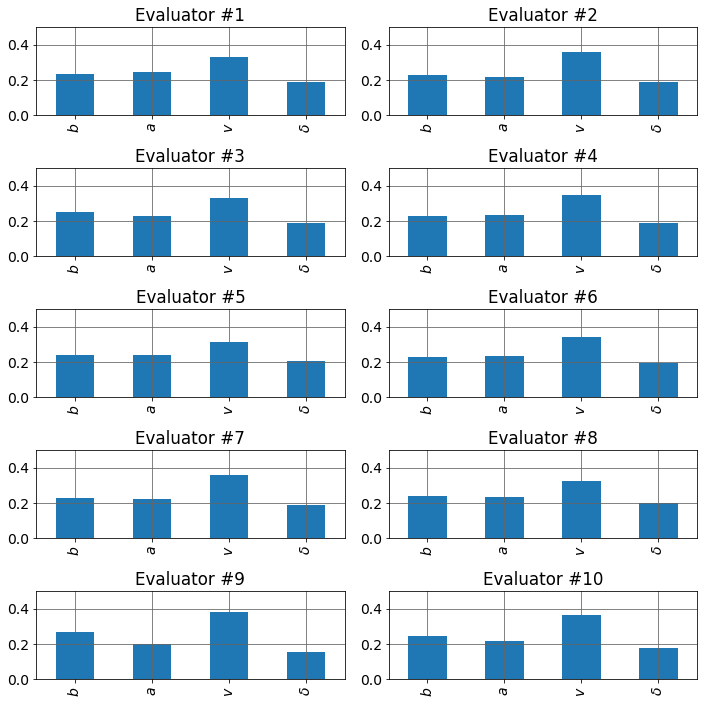

In [29]:

def show_drv_feature_importance():
    fig = plt.figure(figsize= (10,10))
    plt.rcParams["font.size"] = 14
    
    for i_evaluator in range(10):
        risk_label = get_subjective_risk_clf(i_evaluator)
        X, y = get_input_feature_importance('drv', risk_label)
        X = X.iloc[:,:4]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # Number of trees in random forest
        n_estimators = 100
        # risky scene class_weight
        class_weight =  {0: 10, 1: 90}

        rf = RandomForestClassifier(random_state = RANDOM_STATE, 
                                    n_estimators = n_estimators,
                                    class_weight = class_weight, 
                                    max_features = 'log2')
        
        print(X_train.columns)
        
        rf.fit(X_train, y_train)
        labels = ['Safe', 'Risky']
        
   
        fet_ind = np.argsort(rf.feature_importances_)[::-1]
        fet_imp = rf.feature_importances_[fet_ind]
   
        fet_imp = rf.feature_importances_
        
        ax = plt.subplot(5, 2, i_evaluator+1)
        X_train.columns = ['$b$', '$a$', '$v$', r'$\delta$']
        #X_train.columns = ['$b$', '$a$', '$v$', r'$\delta$', r'$\theta$', '$\omega$']
        pd.Series(fet_imp, index=X_train.columns).plot(kind='bar', ax=ax)
        ax.set_title('Evaluator #{}'.format(i_evaluator+1))
        ax.set_ylim([0, 0.5])
        plt.grid(b=True, which='major', color='#666666', linestyle='-')
        plt.tight_layout()
        
        print('Handlineg Evaluator #{}'.format(i_evaluator+1))
    plt.savefig('fig/drv_selected_feature_importance_10.png')
    plt.show()

show_drv_feature_importance()

In [5]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter('ignore')

def get_subjective_risk_clf(i_evaluator):
    risk_label_old = SUBJECTIVE_RISK[i_evaluator]
    risk_label_clf = []
    for i in risk_label_old:
        if i >= RISK_THRESHOLD_per[i_evaluator]:
            risk_label_clf.append(1)
        else:
            risk_label_clf.append(0)
    return risk_label_clf

def get_input_feature_importance(data_type, risk_label):
    if data_type == 'drv':
        input_data = pd.DataFrame()
        risk_label_reshaped = []
        for i_lc in range(len(DATA)):          
            drv_data_i = DATA[i_lc]['drv_data']   
            input_data = pd.concat([input_data, drv_data_i], axis=0)
            risk_label_extended = np.tile(risk_label[i_lc],(len(drv_data_i),1))
            #print(len(risk_label_extended))
            risk_label_reshaped.extend(risk_label_extended)
    elif data_type == 'surr':
        input_data = pd.DataFrame()
        risk_label_reshaped = []
        for i_lc in range(len(DATA)):          
            surr_data_i = DATA[i_lc]['surr_zones']   
            input_data = pd.concat([input_data, surr_data_i], axis=0)
            risk_label_extended = np.tile(risk_label[i_lc],(len(surr_data_i),1))
            #print(len(risk_label_extended))
            risk_label_reshaped.extend(risk_label_extended)
            
    risk_label_raveled = np.ravel(risk_label_reshaped)

    return input_data, risk_label_raveled


This is for 1
This is for 2


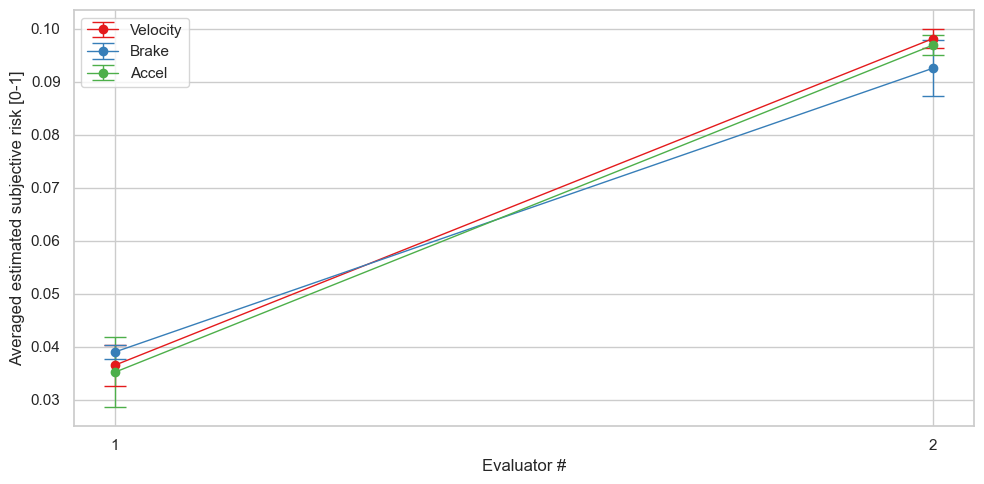

[[0.03651608 0.09812352]
 [0.03900372 0.09253401]
 [0.03519548 0.09689506]]
[[-0.00383895  0.00181198]
 [-0.00128989 -0.00522097]
 [-0.00660299  0.00196554]]


In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
sns.set_context(context=None, font_scale=5, rc=None)


def conduct_t_learners():
    
    acc = []
    err = []
    PARTICIPANT = 2
    for i_evaluator in range(PARTICIPANT):
        risk_label = get_subjective_risk_clf(i_evaluator)
        X, y = get_input_feature_importance('drv', risk_label)
        X_v = X.iloc[:,[2,3]] #velocity
        X_b = X.iloc[:,[0,3]] #brake
        X_a = X.iloc[:,[1,3]] #accel
        n_estimators = 1# Number of trees in random forest
        class_weight =  {0: 10, 1: 90}# risky scene class_weight
        rf = RandomForestClassifier(random_state = RANDOM_STATE, 
                                n_estimators = n_estimators,
                                class_weight = class_weight, 
                                max_features = 'log2')
        
        datasets = [X_v, X_b, X_a]
        acc_learners = []
        err_learners = []
        print('This is for {}'.format(i_evaluator+1))

        for dataset in datasets:
            X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
            rf.fit(X_train, y_train)
            labels = ['Safe', 'Risky']
            y_pred = rf.predict(X_test)
            acc_learners.append(np.mean(y_pred))
            err_learners.append(np.mean(y_pred-y_test))
            #print('Mean of predicted risk of {} is {}'.format(X_train.columns, np.mean(y_pred)))
        acc.append(acc_learners)
        err.append(err_learners)
    

    #plt.savefig('fig/drv_selected_feature_importance_10.png')
    #plt.show()
    
    fig = plt.figure(figsize= (10,5))
    ax = fig.add_subplot(1, 1, 1)
    p = np.arange(PARTICIPANT)
    acc = np.array(acc).T
    err = np.array(err).T
    features = ['Velocity', 'Brake', 'Accel']
    for i in range(3):
        ax.errorbar(p, acc[i], yerr=err[i], marker='o', label= features[i], capthick=1, capsize=8, lw=1)

    #ax.errorbar(x, acc[1,:], yerr=e3, marker='o', label='FLC', capthick=1, capsize=8, lw=1)

    #ax.set_ylim(0, 0.08)
    ax.set_xlabel('Evaluator #')
    ax.set_ylabel('Averaged estimated subjective risk [0-1]')
    ax.legend()
    plt.xticks(p, p+1)
    plt.savefig('fig/t_learner_10_3.png')
    plt.tight_layout()
    
    plt.show()

    print(acc)
    print(err)

conduct_t_learners()    

0
1
2
3
4
5
6
7
8
9


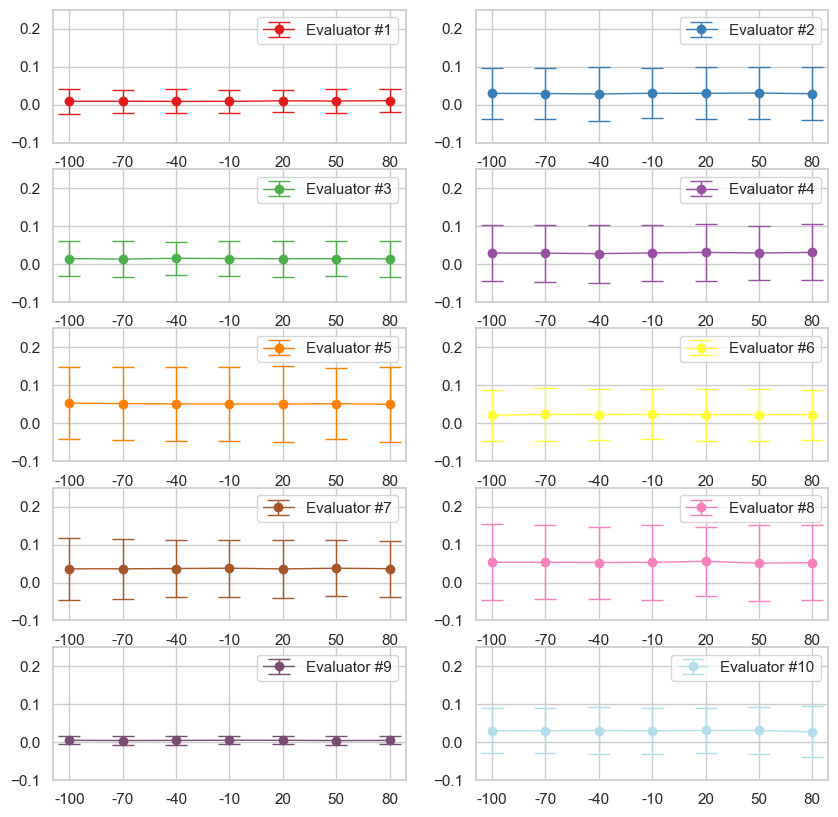

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
RANDOM_STATE = 123

colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#794c74', '#b2deec']


PARTICIPANT = 10
def conduct_s_learners():
    acc = []
    err = []
    coeffs = np.arange(-100, 100, 30)
    for i_evaluator in range(PARTICIPANT):
        acc_coeff = []
        err_coeff = []
        n_estimators = 10# Number of trees in random forest
        class_weight =  {0: 10, 1: 90}# risky scene class_weight
        rf = RandomForestClassifier(random_state = RANDOM_STATE, 
                                n_estimators = n_estimators,
                                class_weight = class_weight, 
                                max_features = 'log2')
        
        
        risk_label = get_subjective_risk_clf(i_evaluator)
        X, y = get_input_feature_importance('drv', risk_label)
        X_v = X.iloc[:,[2,3]] #velocity    
        print(i_evaluator)
        dataset = X_v
        for coeff in coeffs:
            dataset.iloc[:,0] = dataset.iloc[:,0] + coeff * dataset.iloc[:,0]
            X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc_coeff.append(np.mean(y_pred))
            err_coeff.append(np.mean(y_pred-y_test))
            
            #print('Mean of predicted risk of {} is {}'.format(X_train.columns, np.mean(y_pred)))
            
        acc.append(acc_coeff)
        err.append(err_coeff)
    
    fig = plt.figure(figsize= (10,10))
    plt.rcParams["font.size"] = 20
    for j in range(PARTICIPANT):
        ax = fig.add_subplot(5, 2, j+1)
        c = np.arange(len(coeffs))
        ax.errorbar(c, acc[j], yerr=err[j], marker='o', color=colorlist[j], label='Evaluator #'+str(j+1), capthick=1, capsize=8, lw=1)
        plt.xticks(c, coeffs)
        ax.set_xlabel('Coefficient')
        ax.legend()
        ax.set_ylim(-0.1, 0.25)

    plt.savefig('fig/s_learner_velocity_30_2.png')
    plt.show()

conduct_s_learners()    

0
1
2
3
4
5
6
7
8
9


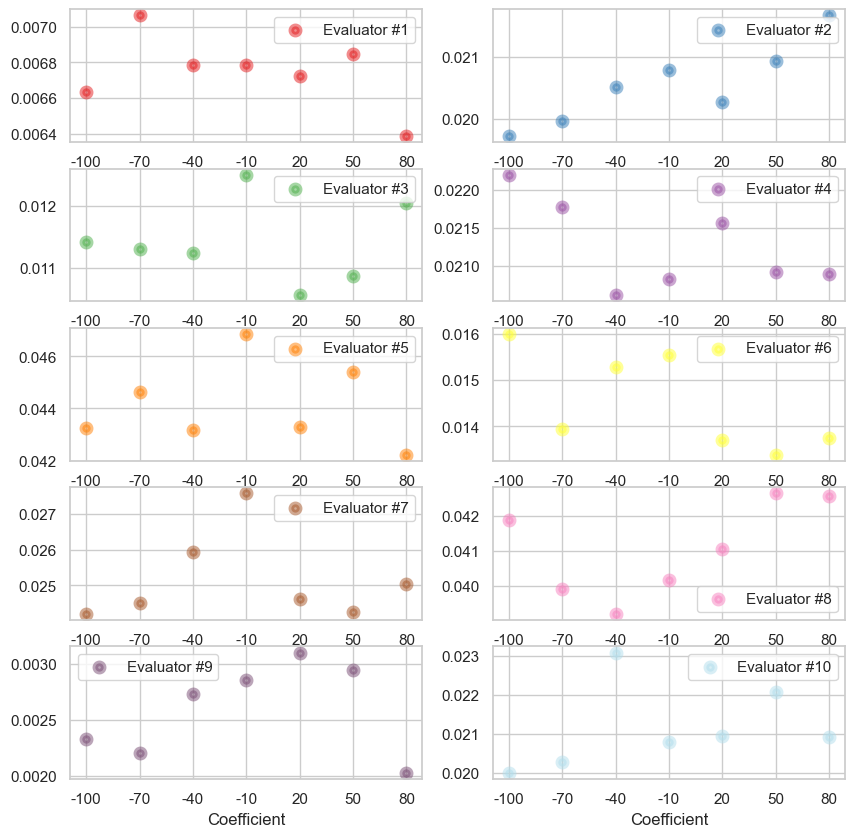

In [39]:
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
RANDOM_STATE = 123

colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#794c74', '#b2deec']


PARTICIPANT = 10
def conduct_s_learners_brake():
    acc = []
    err = []
    coeffs = np.arange(-100, 100, 30)
    for i_evaluator in range(PARTICIPANT):
        acc_coeff = []
        err_coeff = []
        n_estimators = 10# Number of trees in random forest
        class_weight =  {0: 10, 1: 90}# risky scene class_weight
        rf = RandomForestClassifier(random_state = RANDOM_STATE, 
                                n_estimators = n_estimators,
                                class_weight = class_weight, 
                                max_features = 'log2')
        
        
        risk_label = get_subjective_risk_clf(i_evaluator)
        X, y = get_input_feature_importance('drv', risk_label)
        X_v = X.iloc[:,[0,3]] #brake    
        print(i_evaluator)
        dataset = X_v
        for coeff in coeffs:
            dataset.iloc[:,0] = dataset.iloc[:,0] + coeff * dataset.iloc[:,0]
            X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc_coeff.append(np.mean(y_pred))
            err_coeff.append(np.mean(y_pred-y_test))
            
            #print('Mean of predicted risk of {} is {}'.format(X_train.columns, np.mean(y_pred)))
            
        acc.append(acc_coeff)
        err.append(err_coeff)
    
    fig = plt.figure(figsize= (10,10))
    plt.rcParams["font.size"] = 20
    for j in range(PARTICIPANT):
        ax = fig.add_subplot(5, 2, j+1)
        c = np.arange(len(coeffs))
        #ax.errorbar(c, acc[j], yerr=err[j], marker='o', color=colorlist[j], label='Evaluator #'+str(j+1), capthick=1, capsize=8, lw=1)
        plt.scatter(c, acc[j], color=colorlist[j], edgecolor=colorlist[j], alpha=0.5, linewidth=4)

        plt.xticks(c, coeffs)
        ax.set_xlabel('Coefficient')
        ax.legend(['Evaluator #'+str(j+1)])
        #ax.set_ylim(-0.1, 0.1)

    plt.savefig('fig/s_learner_brake_scatter.png')
    plt.show()

conduct_s_learners_brake()    

0
1
2
3
4
5
6
7
8
9


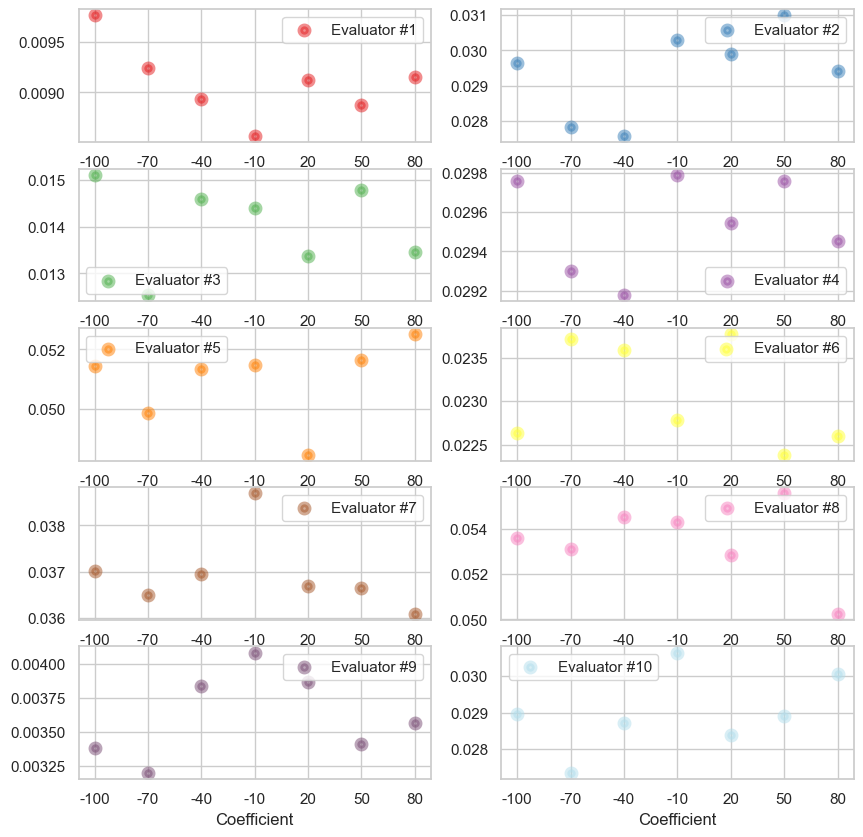

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
RANDOM_STATE = 123

colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#794c74', '#b2deec']


PARTICIPANT = 10
def conduct_s_learners_velocity():
    acc = []
    err = []
    coeffs = np.arange(-100, 100, 30)
    for i_evaluator in range(PARTICIPANT):
        acc_coeff = []
        err_coeff = []
        n_estimators = 10# Number of trees in random forest
        class_weight =  {0: 10, 1: 90}# risky scene class_weight
        rf = RandomForestClassifier(random_state = RANDOM_STATE, 
                                n_estimators = n_estimators,
                                class_weight = class_weight, 
                                max_features = 'log2')
        
        
        risk_label = get_subjective_risk_clf(i_evaluator)
        X, y = get_input_feature_importance('drv', risk_label)
        X_v = X.iloc[:,[2,3]] #velocity    
        print(i_evaluator)
        dataset = X_v
        for coeff in coeffs:
            dataset.iloc[:,0] = dataset.iloc[:,0] + coeff * dataset.iloc[:,0]
            X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc_coeff.append(np.mean(y_pred))
            err_coeff.append(np.mean(y_pred-y_test))
            
            #print('Mean of predicted risk of {} is {}'.format(X_train.columns, np.mean(y_pred)))
            
        acc.append(acc_coeff)
        err.append(err_coeff)
    
    fig = plt.figure(figsize= (10,10))
    plt.rcParams["font.size"] = 20
    for j in range(PARTICIPANT):
        ax = fig.add_subplot(5, 2, j+1)
        c = np.arange(len(coeffs))
        #ax.errorbar(c, acc[j], yerr=err[j], marker='o', color=colorlist[j], label='Evaluator #'+str(j+1), capthick=1, capsize=8, lw=1)
        plt.scatter(c, acc[j], color=colorlist[j], edgecolor=colorlist[j], alpha=0.5, linewidth=4)

        plt.xticks(c, coeffs)
        ax.set_xlabel('Coefficient')
        ax.legend(['Evaluator #'+str(j+1)])
        #ax.set_ylim(-0.1, 0.1)

    plt.savefig('fig/s_learner_velocity_scatter.png')
    plt.show()

conduct_s_learners_velocity()    

0
1
2
3
4
5
6
7
8
9


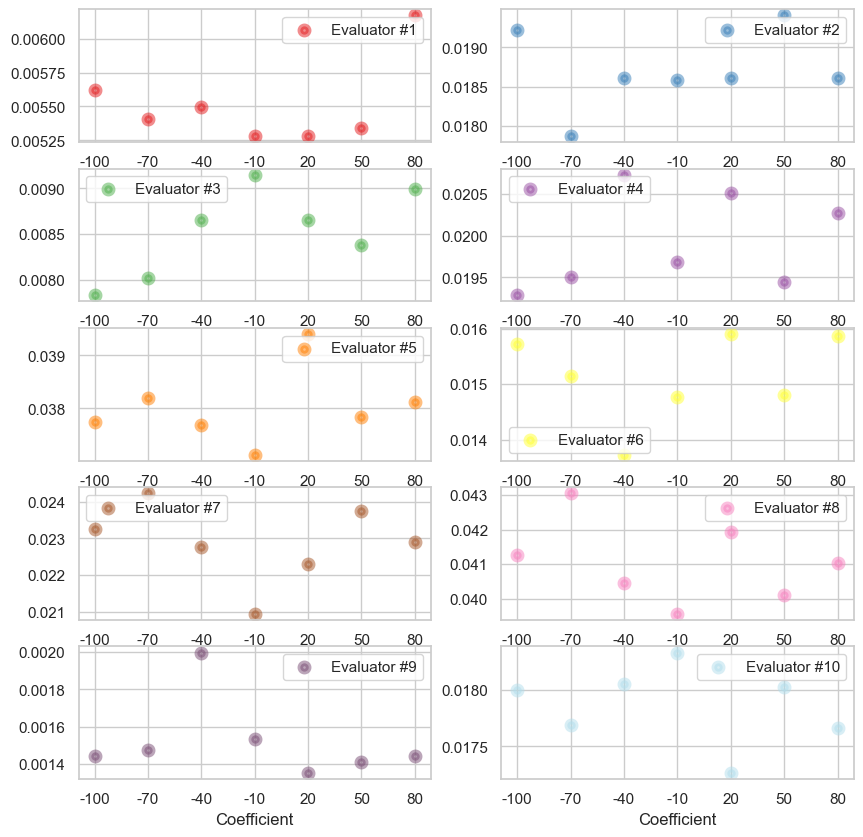

In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
RANDOM_STATE = 123

colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#794c74', '#b2deec']


PARTICIPANT = 10
def conduct_s_learners_accel():
    acc = []
    err = []
    coeffs = np.arange(-100, 100, 30)
    for i_evaluator in range(PARTICIPANT):
        acc_coeff = []
        err_coeff = []
        n_estimators = 10# Number of trees in random forest
        class_weight =  {0: 10, 1: 90}# risky scene class_weight
        rf = RandomForestClassifier(random_state = RANDOM_STATE, 
                                n_estimators = n_estimators,
                                class_weight = class_weight, 
                                max_features = 'log2')
        
        
        risk_label = get_subjective_risk_clf(i_evaluator)
        X, y = get_input_feature_importance('drv', risk_label)
        X_v = X.iloc[:,[1,3]] #accel    
        print(i_evaluator)
        dataset = X_v
        for coeff in coeffs:
            dataset.iloc[:,0] = dataset.iloc[:,0] + coeff * dataset.iloc[:,0]
            X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc_coeff.append(np.mean(y_pred))
            err_coeff.append(np.mean(y_pred-y_test))
            
            #print('Mean of predicted risk of {} is {}'.format(X_train.columns, np.mean(y_pred)))
            
        acc.append(acc_coeff)
        err.append(err_coeff)
    
    fig = plt.figure(figsize= (10,10))
    plt.rcParams["font.size"] = 20
    for j in range(PARTICIPANT):
        ax = fig.add_subplot(5, 2, j+1)
        c = np.arange(len(coeffs))
        #ax.errorbar(c, acc[j], yerr=err[j], marker='o', color=colorlist[j], label='Evaluator #'+str(j+1), capthick=1, capsize=8, lw=1)
        plt.scatter(c, acc[j], color=colorlist[j], edgecolor=colorlist[j], alpha=0.5, linewidth=4)

        plt.xticks(c, coeffs)
        ax.set_xlabel('Coefficient')
        ax.legend(['Evaluator #'+str(j+1)])
        #ax.set_ylim(-0.1, 0.1)

    plt.savefig('fig/s_learner_velocity_accel.png')
    plt.show()

conduct_s_learners_accel()    

This is for handling steering
0
1
2
3
4
5
6
7
8
9


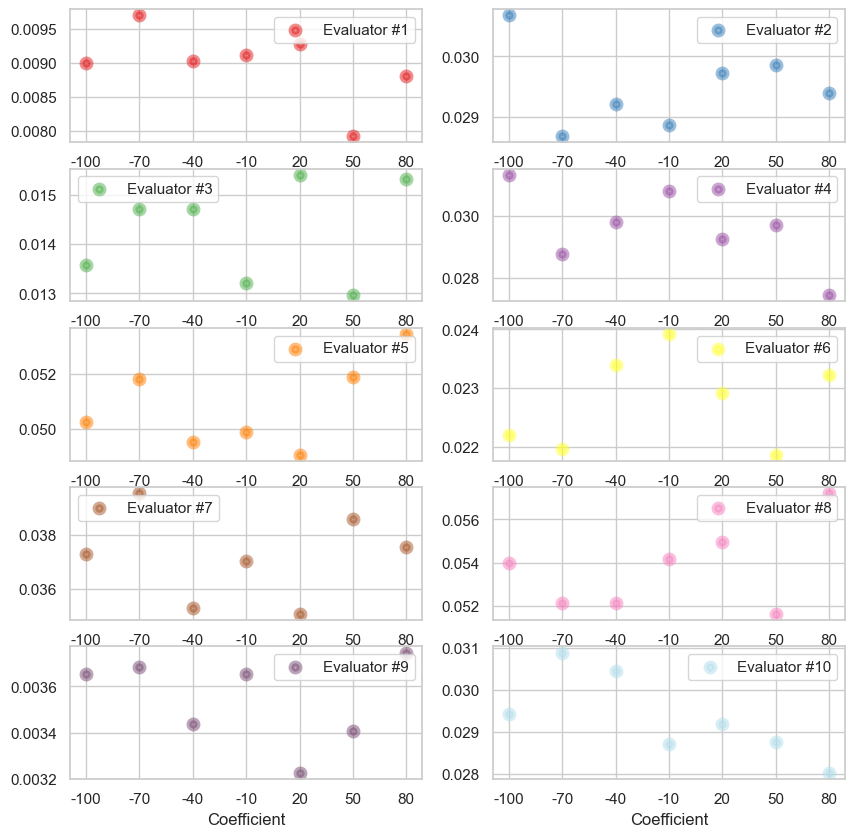

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
RANDOM_STATE = 123

colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#794c74', '#b2deec']


PARTICIPANT = 10
def conduct_s_learner_all(signal, idx):
    print('This is for handling {}'.format(signal)) 
    acc = []
    err = []
    coeffs = np.arange(-100, 100, 30)
    for i_evaluator in range(PARTICIPANT):
        acc_coeff = []
        err_coeff = []
        n_estimators = 10# Number of trees in random forest
        class_weight =  {0: 10, 1: 90}# risky scene class_weight
        rf = RandomForestClassifier(random_state = RANDOM_STATE, 
                                n_estimators = n_estimators,
                                class_weight = class_weight, 
                                max_features = 'log2')
        
        
        risk_label = get_subjective_risk_clf(i_evaluator)
        X, y = get_input_feature_importance('drv', risk_label)
        X_v = X.iloc[:,[2,idx]] #brake    
        print(i_evaluator)
        dataset = X_v
        for coeff in coeffs:
            dataset.iloc[:,0] = dataset.iloc[:,0] + coeff * dataset.iloc[:,0]
            X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc_coeff.append(np.mean(y_pred))
            err_coeff.append(np.mean(y_pred-y_test))
            
            #print('Mean of predicted risk of {} is {}'.format(X_train.columns, np.mean(y_pred)))
            
        acc.append(acc_coeff)
        err.append(err_coeff)
    
    fig = plt.figure(figsize= (10,10))
    plt.rcParams["font.size"] = 20
    for j in range(PARTICIPANT):
        ax = fig.add_subplot(5, 2, j+1)
        c = np.arange(len(coeffs))
        #ax.errorbar(c, acc[j], yerr=err[j], marker='o', color=colorlist[j], label='Evaluator #'+str(j+1), capthick=1, capsize=8, lw=1)
        plt.scatter(c, acc[j], color=colorlist[j], edgecolor=colorlist[j], alpha=0.5, linewidth=4)

        plt.xticks(c, coeffs)
        ax.set_xlabel('Coefficient')
        ax.legend(['Evaluator #'+str(j+1)])
        #ax.set_ylim(-0.1, 0.1)

    fig_name = 'fig/coeff_'+signal+'_scatter.png'
    plt.savefig(fig_name)
    plt.show()
    
    csv_name = 'err_'+signal+ '.csv'
    with open(csv_name, 'w') as f:
        writer = csv.writer(f, lineterminator='\n') # 改行コード（\n）を指定しておく
        writer.writerow(err)     # list（1次元配列）の場合
        
    acc_name = 'predicted_risk_'+signal+ '.csv'    
    with open(acc_name, 'w') as f:
        writer = csv.writer(f, lineterminator='\n') # 改行コード（\n）を指定しておく
        writer.writerow(acc)     # list（1次元配列）の場合

signals = ['velocity', 'brake', 'accel', 'steering']
signal_index = [2, 0, 1, 3]
i = 3
conduct_s_learner_all(signals[i], signal_index[i])    


In [26]:
signals = ['velocity', 'brake', 'accel', 'steering']
for signal in signals:
    
    print('Tere is the signal {}\n'.format(signal)) 
    csv_name = 'err_'+ signal+ '.csv'
    new_csv_name = 'err_'+ signal+ '.csv'
    data = []
    with open(csv_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            for ate in row:
                s = ate.split(',')
                for i in s:
                    print(i[:7])
                    data.append(i[:7])
                    with open(acc_name, 'w') as f:
        
    
    """
    acc_name = 'predicted_risk_'+ signal+ '.csv'    
    with open(acc_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            for risk in row:
                print(risk.split())
                """



Tere is the signal velocity

[-0.032
 -0.031
 -0.029
 -0.029
 -0.032
 -0.032
 -0.032
[-0.069
 -0.069
 -0.066
 -0.070
 -0.068
 -0.068
 -0.066
[-0.049
 -0.047
 -0.049
 -0.046
 -0.047
 -0.047
 -0.047
[-0.071
 -0.076
 -0.074
 -0.075
 -0.075
 -0.074
 -0.071
[-0.095
 -0.095
 -0.098
 -0.095
 -0.097
 -0.094
 -0.099
[-0.067
 -0.068
 -0.069
 -0.066
 -0.066
 -0.068
 -0.066
[-0.074
 -0.071
 -0.075
 -0.071
 -0.079
 -0.074
 -0.076
[-0.095
 -0.098
 -0.092
 -0.097
 -0.097
 -0.102
 -0.098
[-0.011
 -0.010
 -0.012
 -0.011
 -0.010
 -0.012
 -0.011
[-0.059
 -0.061
 -0.059
 -0.062
 -0.064
 -0.060
 -0.059
Tere is the signal brake

[-0.033
 -0.034
 -0.034
 -0.033
 -0.034
 -0.034
 -0.032
[-0.079
 -0.075
 -0.076
 -0.076
 -0.075
 -0.079
 -0.077
[-0.049
 -0.048
 -0.049
 -0.047
 -0.046
 -0.049
 -0.049
[-0.084
 -0.080
 -0.082
 -0.080
 -0.081
 -0.082
 -0.083
[-0.104
 -0.108
 -0.104
 -0.103
 -0.105
 -0.104
 -0.104
[-0.072
 -0.076
 -0.075
 -0.076
 -0.072
 -0.074
 -0.075
[-0.086
 -0.083
 -0.086
 -0.083
 -0.087
 -0.090
 